# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

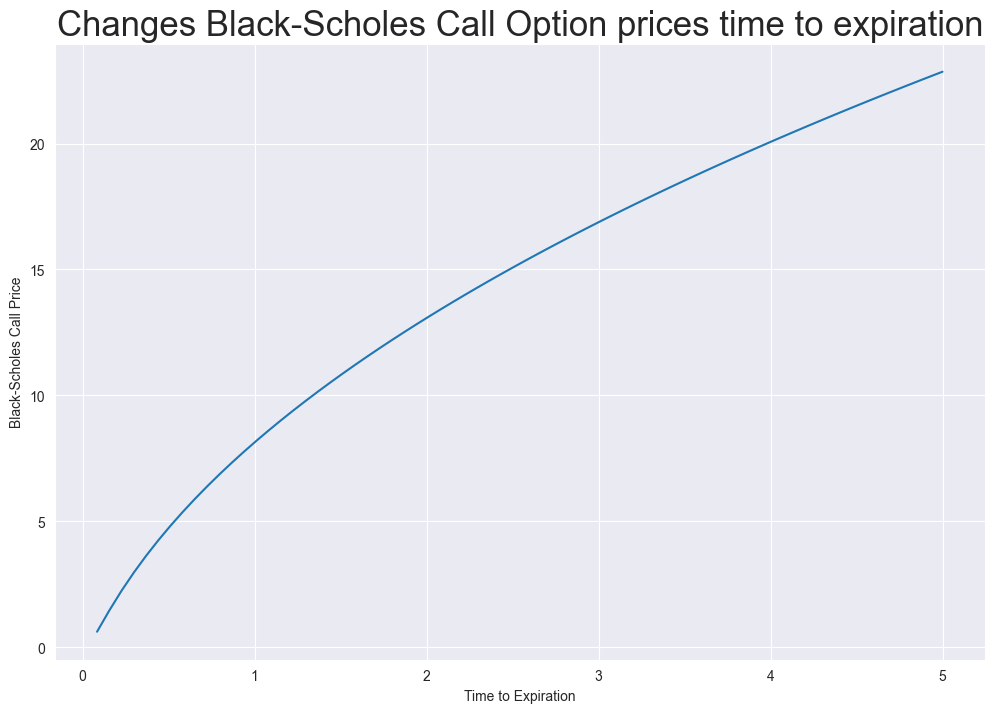

In [2]:


def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

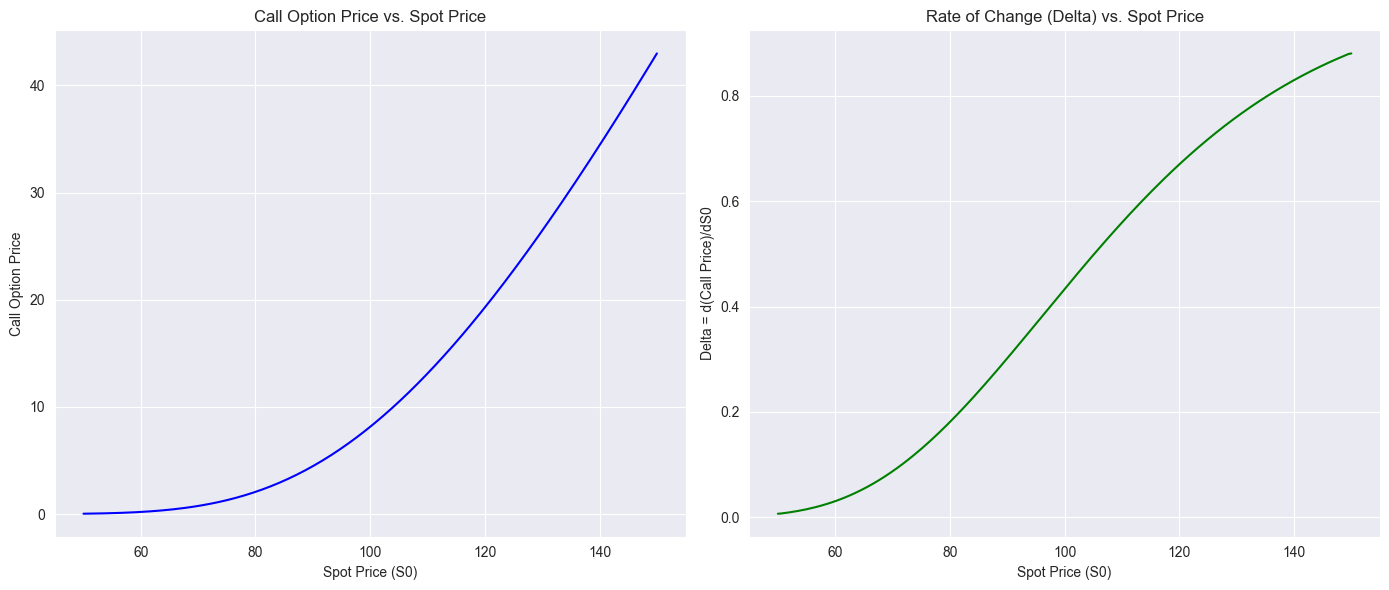

In [3]:
# Varying spot price time is now fixed to 1 year
t=1
r=0
S0_vals = np.linspace(50, 150, 200)
call_prices = [bs_call(S0, K, sigma, t, r) for S0 in S0_vals]

# Numerical derivative of call price w.r.t. spot price (Delta)
delta_vals = np.gradient(call_prices, S0_vals)

# Plot
plt.figure(figsize=(14, 6))

# Subplot 1: Call price vs Spot
plt.subplot(1, 2, 1)
plt.plot(S0_vals, call_prices, color='blue')
plt.title('Call Option Price vs. Spot Price')
plt.xlabel('Spot Price (S0)')
plt.ylabel('Call Option Price')
plt.grid(True)

# Subplot 2: Delta vs Spot
plt.subplot(1, 2, 2)
plt.plot(S0_vals, delta_vals, color='green')
plt.title('Rate of Change (Delta) vs. Spot Price')
plt.xlabel('Spot Price (S0)')
plt.ylabel('Delta = d(Call Price)/dS0')
plt.grid(True)

plt.tight_layout()
plt.show()

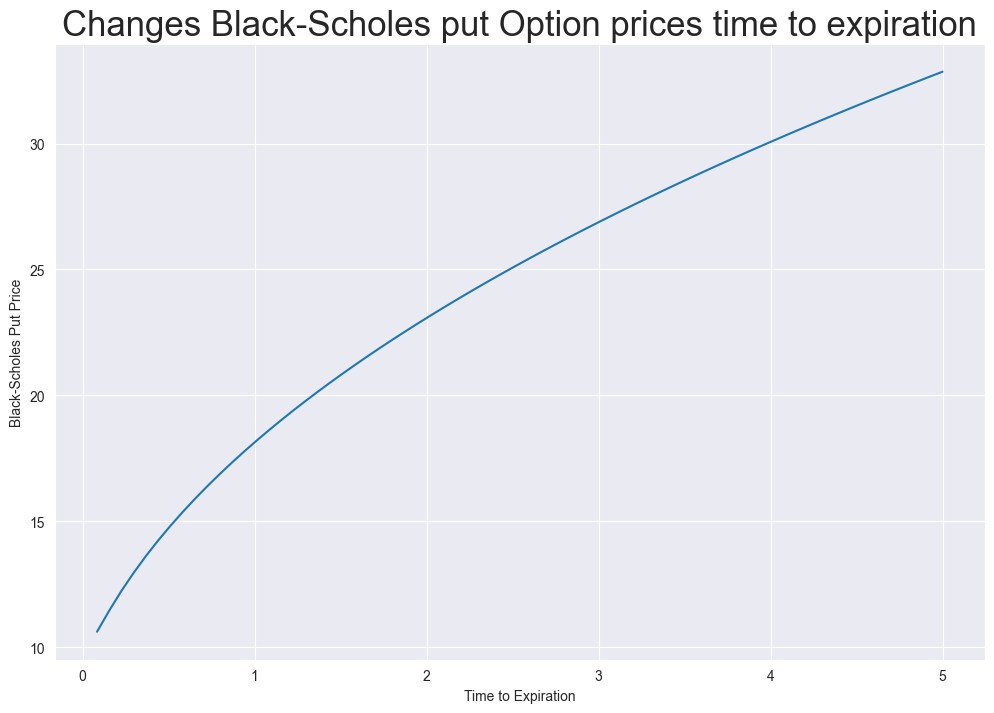

In [4]:
#we are now ploting the put pricing:
put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

**They look identical because they are closely related by the relation C(t)-p(t)=S(0)-ke^{-rt}, and we have assumed r=0.**

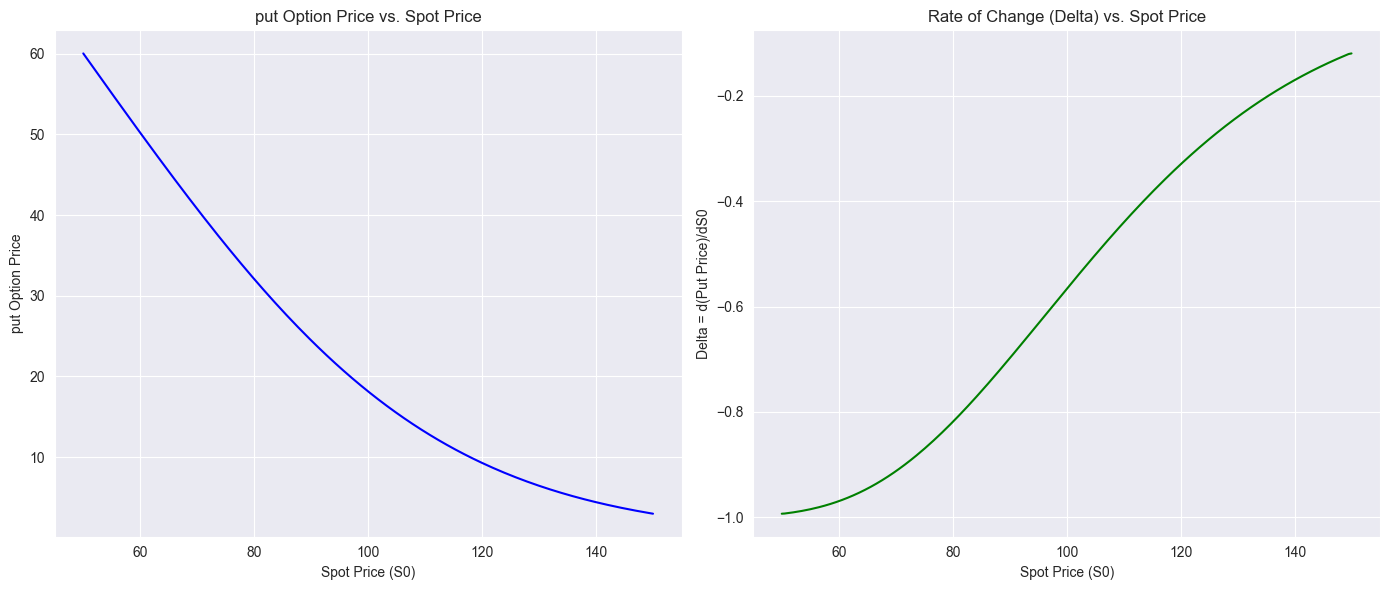

In [5]:
# Varying spot price time is now fixed to 1 year
t=1
r=0
S0_vals = np.linspace(50, 150, 200)
put_prices = [bs_put(S0, K, sigma, t, r) for S0 in S0_vals]

# Numerical derivative of put price w.r.t. spot price (Delta)
delta_vals = np.gradient(put_prices, S0_vals)

# Plot
plt.figure(figsize=(14, 6))

# Subplot 1: put price vs Spot
plt.subplot(1, 2, 1)
plt.plot(S0_vals, put_prices, color='blue')
plt.title('put Option Price vs. Spot Price')
plt.xlabel('Spot Price (S0)')
plt.ylabel('put Option Price')
plt.grid(True)

# Subplot 2: Delta vs Spot
plt.subplot(1, 2, 2)
plt.plot(S0_vals, delta_vals, color='green')
plt.title('Rate of Change (Delta) vs. Spot Price')
plt.xlabel('Spot Price (S0)')
plt.ylabel('Delta = d(Put Price)/dS0')
plt.grid(True)

plt.tight_layout()
plt.show()